In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime 
import calendar
from pathlib import Path

In [2]:

p = Path(os.getcwd()).parents[2] #donne path vers fichier contenant data ( 3 level up d ici)
df=pd.read_csv(str(p)+"\\data\\f_ETHUSD_1.csv",)
df["Change"] = df["Close"] / df["Open"]
df["Var"]=df["High"]-df["Low"]

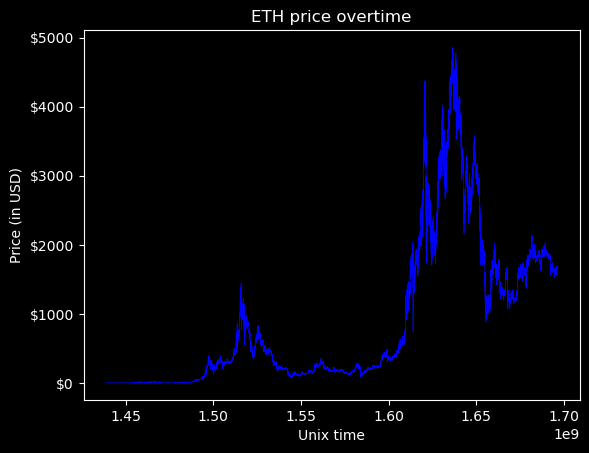

In [7]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"],linewidth=0.5,color="b")
plt.title("ETH price overtime")
plt.xlabel("Unix time")
plt.ylabel("Price (in USD)")
y_ticks=list(range(0,5001,1000))
plt.yticks(y_ticks,labels=[f"${tick}" for tick in y_ticks])
plt.show()

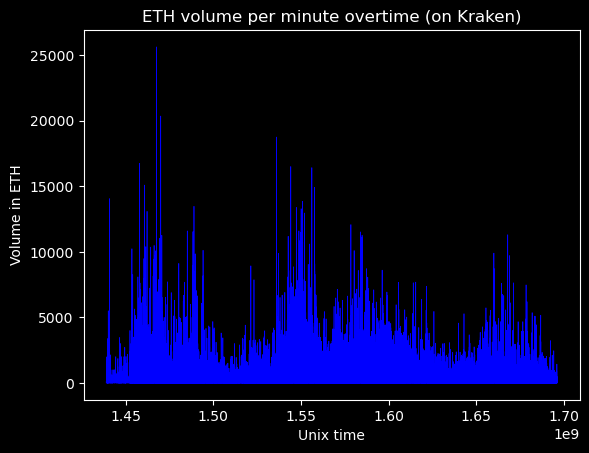

In [8]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Volume"],linewidth=0.5,color="b")
plt.title("ETH volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in ETH")
#y_ticks=list(range(0,19,2))
#plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

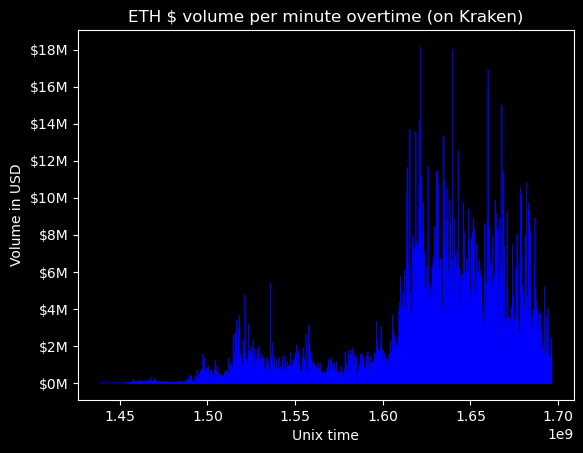

In [9]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"]*df["Volume"]/1000000,linewidth=0.5,color="b")
plt.title("ETH $ volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in USD")
y_ticks=list(range(0,19,2))
plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

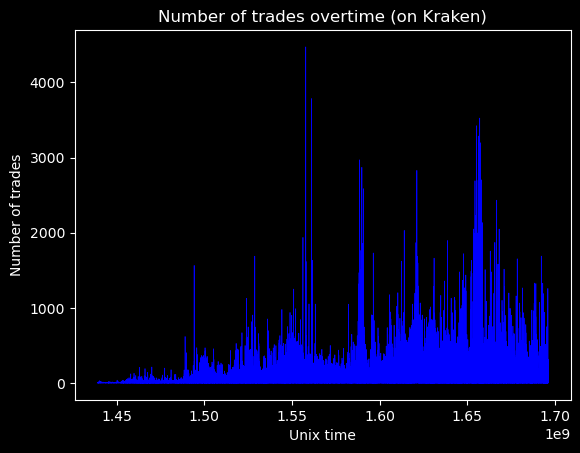

In [10]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Trades"],linewidth=0.5,color="b")
plt.title("Number of trades overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Number of trades")
plt.show()

In [11]:
hours=np.arange(0,24,1)
week=np.arange(0,7,1)
sum_count=np.zeros((len(week),len(hours),2))
for ind,time in enumerate(df["Time"]):
   hour=datetime.datetime.utcfromtimestamp(time).hour
   weekday=datetime.datetime.utcfromtimestamp(time).weekday()
   sum_count[weekday][hour][0]+=df["Trades"][ind]
   sum_count[weekday][hour][1]+=1
sum_count

        

array([[[346188.,  18254.],
        [279765.,  17637.],
        [243833.,  17247.],
        [230809.,  16896.],
        [206913.,  16938.],
        [202287.,  16704.],
        [226269.,  16997.],
        [232504.,  16942.],
        [245634.,  17343.],
        [240734.,  17291.],
        [230608.,  17358.],
        [236462.,  17571.],
        [297660.,  18254.],
        [342610.,  18664.],
        [404864.,  19029.],
        [371831.,  19155.],
        [405905.,  19231.],
        [326738.,  18811.],
        [307464.,  18802.],
        [330142.,  18865.],
        [328807.,  18785.],
        [311321.,  18450.],
        [300805.,  18425.],
        [295754.,  18292.]],

       [[381760.,  18547.],
        [284477.,  18007.],
        [240503.,  17626.],
        [248419.,  17489.],
        [244908.,  17170.],
        [228120.,  17095.],
        [220368.,  17270.],
        [213936.,  17333.],
        [261564.,  17636.],
        [246259.,  17645.],
        [236223.,  17755.],
        [270777., 

In [12]:
means=np.zeros((7,24))
for i in range(7):
    for j in range(24):
        means[i][j]=sum_count[i][j][0]/(425*60)
means
#425 de chaque jour peut etre +-1, *60 minute par heure

array([[13.576     , 10.97117647,  9.56207843,  9.05133333,  8.11423529,
         7.93282353,  8.87329412,  9.11780392,  9.63270588,  9.44054902,
         9.04345098,  9.27301961, 11.67294118, 13.43568627, 15.87701961,
        14.58160784, 15.91784314, 12.8132549 , 12.05741176, 12.9467451 ,
        12.89439216, 12.20866667, 11.79627451, 11.59819608],
       [14.97098039, 11.15596078,  9.4314902 ,  9.74192157,  9.60423529,
         8.94588235,  8.64188235,  8.38964706, 10.25741176,  9.65721569,
         9.26364706, 10.61870588, 12.17854902, 14.16203922, 16.26501961,
        15.35239216, 15.17305882, 12.9052549 , 13.23447059, 13.42078431,
        13.91635294, 11.64894118, 10.90486275, 10.79329412],
       [12.93305882, 10.19211765,  9.86713725,  9.93784314,  9.77411765,
         8.49486275,  8.77945098,  8.68686275,  9.56007843,  8.43870588,
         9.44039216, 10.36611765, 13.22992157, 14.78721569, 15.67141176,
        14.9387451 , 16.64882353, 13.45682353, 15.30101961, 14.73780392,
  

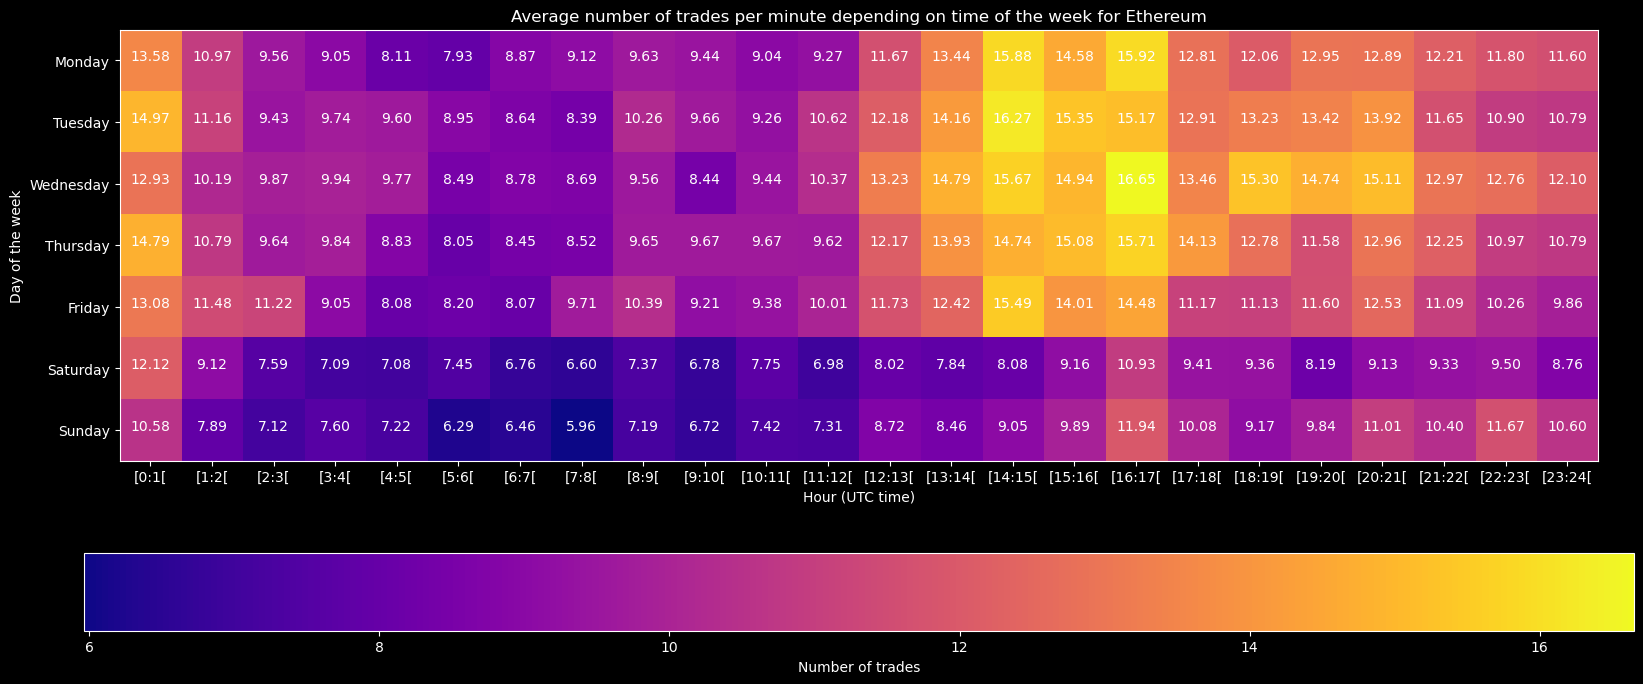

In [13]:
fig, ax = plt.subplots()
im=ax.imshow(means,cmap="plasma")
hours=np.arange(0,24,1)
week=np.arange(0,7,1)
for i in week:
    for j in hours:
        ax.text(j,i,f"{means[i][j]:.2f}",horizontalalignment="center")
        
ax.set_xlabel("Hour (UTC time)")
ax.set_ylabel("Day of the week")
ax.set_title("Average number of trades per minute depending on time of the week for Ethereum")
cbar = ax.figure.colorbar(im, ax=ax,location="bottom",label="Number of trades")
x_ticks=np.arange(0,24,1)
y_ticks=np.arange(0,7,1)
ax.set_xticks(ticks=x_ticks,labels=[f"[{i}:{i+1}[" for i in x_ticks])
ax.set_yticks(ticks=y_ticks,labels=[i for i in calendar.day_name])
fig.set_figheight(8)
fig.set_figwidth(20)

plt.show()

In [14]:
fees = 0.0052 #fees sur kraken.com 0.26% buy + 0.26% sell
buy = 1
sell = -1
decisionsArray = np.zeros(len(df.index))
for candle in df.index:
    if df["Change"][candle] > 1 + fees:
        decisionsArray[candle] = buy
    elif df["Change"][candle] < 1:
        decisionsArray[candle] = sell
df["Decisions"] = decisionsArray
#buy si 1+fee de rendement ou plus, sell si rendement < 1.

In [15]:
nBuys = 0
nSells = 0
for decision in decisionsArray:
    if decision == buy:
        nBuys += 1
    elif decision == sell:
        nSells += 1
print(f"nBuys: {nBuys}\nnSells: {nSells}")
#bcp trop de sells par rapport à buy

nBuys: 27195
nSells: 1104167


In [14]:
def labelDataAdvanced(data, treshold):
    labels = np.zeros(data.size)
    firstPrice = data[0]
    highPrice = firstPrice
    lowPrice = firstPrice
    highTick = 0
    lowTick = 0
    currentDir = 0
    firstHighLowIndex = 0
    
    for i in range(1,data.size):
        if data[i] >= firstPrice + firstPrice*treshold:
            highPrice = data[i]
            highTick = i
            firstHighLowIndex = i
            currentDir = 1
            break
        if data[i] < firstPrice - firstPrice*treshold:
            lowPrice = data[i]
            lowTick = i
            firstHighLowIndex = i
            currentDir = -1
            break
    # fctionne jusqu'ici
    for i in range(firstHighLowIndex+1,data.size):
        if currentDir > 0: 
            if (data[i] > highPrice):
                highPrice = data[i]
                highTick = i
            elif (data[i] < (highTick - highTick*treshold)):# and lowTick <= highTick): #and ici normalement
                for j in range(lowTick+1, highTick+1):
                    labels[j] = currentDir
                lowPrice = data[i]
                lowTick = i
                currentDir = -1
        elif currentDir < 0:
            if(data[i] <= lowPrice):
                lowPrice = data[i]
                lowTick = i
            elif (data[i] > (lowTick + lowTick * treshold)):# and highTick <= lowTick): #and ici aussi
                for j in range(highTick+1, lowTick+1):
                    labels[j] = currentDir
                highPrice = data[i]
                highTick = i
                currentDir = 1
    return labels

In [11]:
labels5prct= labelDataAdvanced(df["Close"], 5)
print(labels5prct)

(18.0, 39566)


In [13]:
print(df["Close"][0])

3.0


In [8]:
labelsPoint5prct.mean()

0.1526399004950584

In [20]:
df

,Time,Open,High,Low,Close,Volume,Trades,Change,Var
0,1438956180,3.00000,3.00000,3.00,3.00,81.857278,2,1.000000,0.00000
1,1438967940,3.00001,3.00001,3.00,3.00,42.073291,2,0.999997,0.00001
2,1439016180,3.00000,3.00000,3.00,3.00,0.400000,1,1.000000,0.00000
3,1439026260,2.00000,2.00000,2.00,2.00,125.000000,2,1.000000,0.00000
4,1439051400,1.20000,1.20000,1.20,1.20,54.759700,1,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...
3000449,1696117980,1670.73000,1670.73000,1670.73,1670.73,0.209407,5,1.000000,0.00000
3000450,1696118040,1670.73000,1670.73000,1670.73,1670.73,5.331141,4,1.000000,0.00000
3000451,1696118100,1671.60000,1671.60000,1671.60,1671.60,0.394274,1,1.000000,0.00000
3000452,1696118220,1671.58000,1671.58000,1671.58,1671.58,0.014400,2,1.000000,0.00000


In [73]:
for i in range(1,labelsPoint5prct.size) :
    if labelsPoint5prct[i] == 0:
        print(i)
        break

913


In [59]:
df["Open"][9700:9706]

9700    10.99988
9701    10.99998
9702    10.99999
9703    11.00000
9704    11.06986
9705    11.01000
Name: Open, dtype: float64

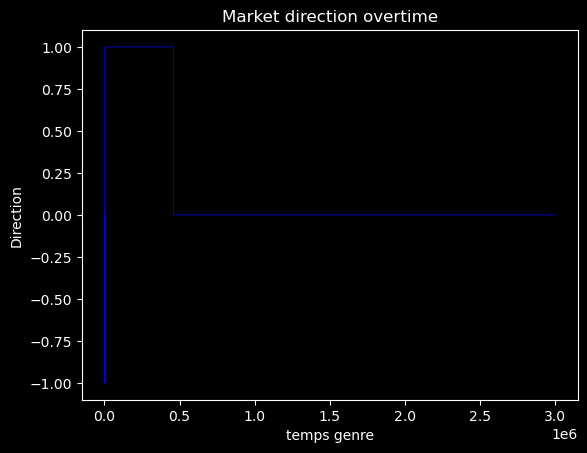

In [68]:
plt.style.use("dark_background")
plt.plot(labelsPoint5prct,linewidth=0.5,color="b")
plt.title("Market direction overtime")
plt.xlabel("temps genre")
plt.ylabel("Direction")
plt.show()

In [1]:
x=5
x*=2 +1

In [3]:
df

,Time,Open,High,Low,Close,Volume,Trades,Change,Var
0,1438956180,3.00000,3.00000,3.00,3.00,81.857278,2,1.000000,0.00000
1,1438967940,3.00001,3.00001,3.00,3.00,42.073291,2,0.999997,0.00001
2,1439016180,3.00000,3.00000,3.00,3.00,0.400000,1,1.000000,0.00000
3,1439026260,2.00000,2.00000,2.00,2.00,125.000000,2,1.000000,0.00000
4,1439051400,1.20000,1.20000,1.20,1.20,54.759700,1,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...
3000449,1696117980,1670.73000,1670.73000,1670.73,1670.73,0.209407,5,1.000000,0.00000
3000450,1696118040,1670.73000,1670.73000,1670.73,1670.73,5.331141,4,1.000000,0.00000
3000451,1696118100,1671.60000,1671.60000,1671.60,1671.60,0.394274,1,1.000000,0.00000
3000452,1696118220,1671.58000,1671.58000,1671.58,1671.58,0.014400,2,1.000000,0.00000
